# Proyecto 9:

#### `Ajustar finamente un LLM con datos médicos para tareas como clasificación de documentos clínicos o extracción de información específica`

#### Recolección y preparación de datos

- Recolección de datos médicos cumpliendo regulaciones
- Anonimización y preprocesamiento adecuado de los datos
- Revisión ética y legal del uso de los dato

## Spanish Mayo Clinic Diseases

Este archivo se ha realizado recogiendo las enfermedades mostradas en la página web de Mayo Clinic a través de la URL:
- https://www.mayoclinic.org/es-es/diseases-conditions/.

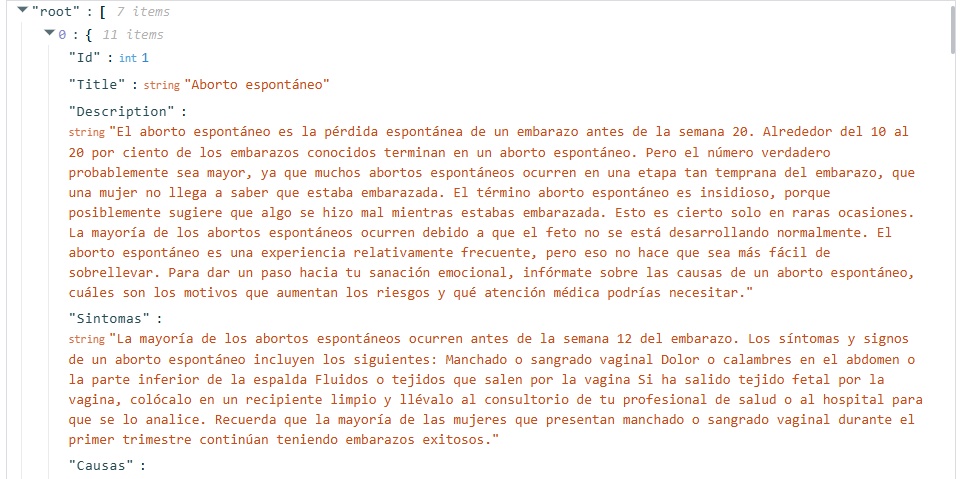


In [50]:
## Lectura de los datos
import pandas as pd
import json

with open('diseases.json','r',encoding='utf-8') as f:
    data = json.load(f)

## Creación de un DataFrame
df = pd.DataFrame(data)

In [51]:
df.head(3)

,Id,Title,Description,Sintomas,Causas,FactoresRiesgo,Complicaciones,Prevencion,Diagnostico,Tratamiento,Departamentos
0,1,Aborto espontáneo,El aborto espontáneo es la pérdida espontánea ...,La mayoría de los abortos espontáneos ocurren ...,Genes o cromosomas anormales\r\nLa mayoría de ...,Diversos factores aumentan el riesgo de tener ...,Algunas mujeres que sufren un aborto espontáne...,"A menudo, no hay nada que puedas hacer para pr...",Tu profesional de salud puede realizarte una v...,Amenaza de aborto espontáneo\r\nAnte la amenaz...,Obstetricia y Ginecología
1,2,Absceso dental,Un absceso dental es la acumulación de pus cau...,Los signos y los síntomas de un absceso dental...,Un absceso dental periapical ocurre cuando las...,Estos factores pueden aumentar el riesgo de pa...,Un absceso dental no se va sin tratamiento. Si...,Evitar las caries dentales es esencial para pr...,Además de examinar el diente y el área circund...,El objetivo del tratamiento es deshacerse de l...,None
2,3,Abuso de drogas recetadas,El abuso de medicamentos recetados es el uso c...,Los signos y síntomas de abuso de medicamentos...,Los adolescentes y los adultos abusan de medic...,Algunas personas temen convertirse en adictos ...,El abuso de medicamentos con receta puede prov...,El abuso de medicamentos recetados puede ocurr...,"Por lo general, los médicos basan un diagnósti...",Las opciones de tratamiento para el abuso de m...,Psiquiatría y psicología;Servicios contra las ...


In [52]:
# Creamos una funcion para que me presente un registro
from utils import print_description_register
print_description_register(0,df)

{
    Registro 0:
    ----------------------------------------
    Title:
        Aborto espontáneo

    Description:
        El aborto espontáneo es la pérdida espontánea de un embarazo antes de la semana 20. Alrededor del 10 al 20 por ciento de los embarazos conocidos terminan en un aborto espontáneo. Pero el número verdadero probablemente sea mayor, ya que muchos abortos espontáneos ocurren en una etapa tan temprana del embarazo, que una mujer no llega a saber que estaba embarazada.
El término aborto espontáneo es insidioso, porque posiblemente sugiere que algo se hizo mal mientras estabas embarazada. Esto es cierto solo en raras ocasiones. La mayoría de los abortos espontáneos ocurren debido a que el feto no se está desarrollando normalmente.
El aborto espontáneo es una experiencia relativamente frecuente, pero eso no hace que sea más fácil de sobrellevar. Para dar un paso hacia tu sanación emocional, infórmate sobre las causas de un aborto espontáneo, cuáles son los motivos que au

### Creando la nueva Data: Text- label

In [53]:
# Creamosun nuevo dataframe
new_data = pd.DataFrame()

#Agregamos la columna texto y la label
new_data['Text'] = df['Sintomas']
new_data['Label'] = df['Title']

In [54]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1128 non-null   object
 1   Label   1209 non-null   object
dtypes: object(2)
memory usage: 19.0+ KB


### Observando la data nula

In [55]:
new_data[new_data['Text'].isnull()]

,Text,Label
12,None,Adrenoleucodistrofia
41,None,Aleteo auricular
59,None,Aneurisma de la aorta
61,None,Aneurisma de la arteria poplítea
62,None,Aneurismas
...,...,...
1165,None,Tumores de células germinativas
1168,None,Tumores desmoplásicos de células pequeñas y re...
1169,None,Tumores embrionarios
1170,None,Tumores en las parótidas


### Eliminamos los nulos

In [56]:
# Filtramos los registros que no tienen texto
new_data = new_data.dropna()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 0 to 1208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1128 non-null   object
 1   Label   1128 non-null   object
dtypes: object(2)
memory usage: 26.4+ KB


In [57]:
def print_text_label(index, df, indent=4):
    indent_str = " " * indent
    print("{")
    print(indent_str + "Texto:")
    print(indent_str + "-" * 40)  # Separador para mayor claridad
    print(indent_str + indent_str + str(df['Text'][index]))
    print()
    print(indent_str + "Etiqueta:")
    print(indent_str + indent_str + str(df['Label'][index]))
    print(indent_str + "-" * 40)  # Separador final
    print("}")

### Imprimir algunos registros

In [58]:
print_text_label(0, new_data)

{
    Texto:
    ----------------------------------------
        La mayoría de los abortos espontáneos ocurren antes de la semana 12 del embarazo.
Los síntomas y signos de un aborto espontáneo incluyen los siguientes:
Manchado o sangrado vaginal
Dolor o calambres en el abdomen o la parte inferior de la espalda
Fluidos o tejidos que salen por la vagina
Si ha salido tejido fetal por la vagina, colócalo en un recipiente limpio y llévalo al consultorio de tu profesional de salud o al hospital para que se lo analice.
Recuerda que la mayoría de las mujeres que presentan manchado o sangrado vaginal durante el primer trimestre continúan teniendo embarazos exitosos.

    Etiqueta:
        Aborto espontáneo
    ----------------------------------------
}


In [59]:
print_text_label(1, new_data)

{
    Texto:
    ----------------------------------------
        Los signos y los síntomas de un absceso dental incluyen los siguientes:
Dolor de muela intenso, persistente y grave que puede emitirse hasta la mandíbula, el cuello o la oreja
Sensibilidad a temperaturas frías y calientes
Sensibilidad a la presión de masticar o morder
Fiebre
Hinchazón en el rosto o en las mejillas
Inflamación y sensibilidad a la palpación de ganglios linfáticos debajo de la mandíbula o en el cuello
Sarpullido repentino de líquido salino, con olor y gusto desagradables en la boca o alivio del dolor si se rompe el absceso
Dificultad para respirar o tragar
Cuándo consultar al médico
Consulta con tu dentista de inmediato si tienes algún signo o síntoma de absceso dental.
Si tienes fiebre e hinchazón en la cara y no puedes comunicarse con tu dentista, ve a la sala de emergencias. También debes ir a la sala de emergencias si tienes dificultad para respirar o tragar. Estos síntomas pueden indicar que la infecci

### Filtramos los sintomas del texto

In [60]:
new_data.loc[:,'Text'] = new_data['Text'].apply(lambda x: x.split(':')[-1].strip())

In [61]:
print_text_label(0, new_data)

{
    Texto:
    ----------------------------------------
        Manchado o sangrado vaginal
Dolor o calambres en el abdomen o la parte inferior de la espalda
Fluidos o tejidos que salen por la vagina
Si ha salido tejido fetal por la vagina, colócalo en un recipiente limpio y llévalo al consultorio de tu profesional de salud o al hospital para que se lo analice.
Recuerda que la mayoría de las mujeres que presentan manchado o sangrado vaginal durante el primer trimestre continúan teniendo embarazos exitosos.

    Etiqueta:
        Aborto espontáneo
    ----------------------------------------
}


### Analisando datos repetidos

In [62]:
new_data['Label'].value_counts()

Label
Difteria                          14
Hombro dislocado                  12
Celulitis                          2
Obesidad infantil                  1
Ojos secos                         1
                                  ..
Enfermedad de Still del adulto     1
Enfermedad de Tay-Sachs            1
Enfermedad de von Willebrand       1
Enfermedad de Whipple              1
Zóster                             1
Name: count, Length: 1103, dtype: int64

### Difteria , Hombro dislocado , Celulitis

In [63]:
# Fitlramos por Difteria
new_data[new_data['Label'] == 'Difteria']

,Text,Label
300,Respira en forma ruidosa haciendo un silbido a...,Difteria
301,Una membrana gruesa y de color gris que recubr...,Difteria
303,Una membrana gruesa y de color gris que recubr...,Difteria
313,Una membrana gruesa y de color gris que recubr...,Difteria
323,Una membrana gruesa y de color gris que recubr...,Difteria
333,Una membrana gruesa y de color gris que recubr...,Difteria
343,Una membrana gruesa y de color gris que recubr...,Difteria
353,Una membrana gruesa y de color gris que recubr...,Difteria
363,Una membrana gruesa y de color gris que recubr...,Difteria
373,Una membrana gruesa y de color gris que recubr...,Difteria


In [64]:
print_text_label(300, new_data)


{
    Texto:
    ----------------------------------------
        Respira en forma ruidosa haciendo un silbido agudo al inhalar o al exhalar.
Hace un silbido agudo cuando no llora o se agita.
Comienza a babear o tiene dificultad para tragar
Parece ansioso y agitado o fatigado y desanimado
Respira de forma más rápida de lo habitual
Tiene dificultad para respirar
Desarrolla un color azulado o grisáceo en la piel alrededor de la nariz, la boca o las uñas (cianosis)

    Etiqueta:
        Difteria
    ----------------------------------------
}


In [65]:
print_text_label(301, new_data)


{
    Texto:
    ----------------------------------------
        Una membrana gruesa y de color gris que recubre la garganta y las amígdalas
Dolor de garganta y ronquera
Agrandamiento de los ganglios linfáticos del cuello
Dificultad para respirar o respiración rápida
Secreción nasal
Fiebre y escalofríos
Malestar general
En algunas personas, la infección con bacterias que causan la difteria provoca una enfermedad leve, o bien ni siquiera presenta signos y síntomas evidentes. Las personas infectadas que no saben que padecen la enfermedad se conocen como «portadores de la difteria», ya que pueden transmitir la infección sin estar enfermos.
Difteria de la piel (cutánea)
Un segundo tipo de difteria puede afectar a la piel y causando dolor, enrojecimiento e hinchazón como otras infecciones bacterianas de la piel. Las úlceras cubiertas por una membrana gris también pueden ser difteria cutánea.
Aunque es más común en los climas tropicales, la difteria en la piel también se presenta en los Est

### Agrupando el Difteria

In [66]:
# Unimos los textos de 2 registros y eliminamos los otros de Difteria
new_data.loc[300, 'Text'] += ' ' + new_data.loc[301, 'Text']

# Almacenamos los registros que son de Difteria pero no el 300
index_excluir = new_data[(new_data['Label'] == 'Difteria') & (new_data.index != 300)].index

# Eliminamos los registros
new_data = new_data.drop(index_excluir)

### Analizando Hombro Dislocado

In [67]:
# Fitlramos por Difteria
new_data[new_data['Label'] == 'Hombro dislocado']

,Text,Label
616,Dolor de hombro\r\nDebilidad del hombro o del ...,Hombro dislocado
617,No muevas la articulación. Coloca una tablilla...,Hombro dislocado
626,No muevas la articulación. Coloca una tablilla...,Hombro dislocado
641,No muevas la articulación. Coloca una tablilla...,Hombro dislocado
656,No muevas la articulación. Coloca una tablilla...,Hombro dislocado
671,No muevas la articulación. Coloca una tablilla...,Hombro dislocado
686,No muevas la articulación. Coloca una tablilla...,Hombro dislocado
701,No muevas la articulación. Coloca una tablilla...,Hombro dislocado
716,No muevas la articulación. Coloca una tablilla...,Hombro dislocado
730,No muevas la articulación. Coloca una tablilla...,Hombro dislocado


In [68]:
print_text_label(616, new_data)

{
    Texto:
    ----------------------------------------
        Dolor de hombro
Debilidad del hombro o del brazo
Hombro hinchado o con hematomas
Movimiento limitado del hombro
Un bulto y una inflamación en la parte superior del hombro
Cuándo consultar al médico
Comunícate con el médico si tienes sensibilidad o dolor persistentes cerca del extremo de la clavícula.
When to see a doctor
Contact your doctor if you have persistent tenderness or pain near the end of your collarbone.

    Etiqueta:
        Hombro dislocado
    ----------------------------------------
}


In [69]:
print_text_label(617, new_data)

{
    Texto:
    ----------------------------------------
        No muevas la articulación. Coloca una tablilla o férula para mantener la articulación en la posición actual. No trates de mover el hombro ni de volver a colocarlo en su lugar a la fuerza. Esto puede dañar la articulación del hombro y los músculos, ligamentos, nervios o vasos sanguíneos que la rodean.
No muevas la articulación.
Coloca hielo en la articulación lesionada. Al aplicar hielo en el hombro, ayudas a reducir el dolor y la hinchazón ya que controlas el sangrado interno y la acumulación de líquidos en la articulación y alrededor de esta.
Coloca hielo en la articulación lesionada.

    Etiqueta:
        Hombro dislocado
    ----------------------------------------
}


### Eliminamos todos menos el registro 616

In [70]:
# Almacenamos los registros que son de Hombro dislocado pero no el 616
index_excluir = new_data[(new_data['Label'] == 'Hombro dislocado') & (new_data.index != 616)].index

# Eliminamos los registros
new_data = new_data.drop(index_excluir)

In [71]:
new_data['Label'].value_counts()

Label
Celulitis                         2
Aborto espontáneo                 1
Nódulos tiroideos                 1
Oído de nadador                   1
Oclusión por cerumen              1
                                 ..
Enfermedad de Raynaud             1
Enfermedad de Still del adulto    1
Enfermedad de Tay-Sachs           1
Enfermedad de von Willebrand      1
Zóster                            1
Name: count, Length: 1103, dtype: int64

### Analizando el caso Celulitis

In [72]:
# Fitlramos por Difteria
new_data[new_data['Label'] == 'Celulitis']

,Text,Label
195,La celulitis o piel de naranja se parece a la ...,Celulitis
196,"Tienes un sarpullido rojo, hinchado, sensible ...",Celulitis


In [73]:
print_text_label(195, new_data)

{
    Texto:
    ----------------------------------------
        La celulitis o piel de naranja se parece a la piel con hoyuelos o con protuberancias. A veces se describe como tener una textura de queso cottage o cáscara de naranja.
Puedes ver la celulitis leve solo si te pellizcas la piel en un área donde tienes celulitis, como los muslos. La celulitis más severa hace que la piel se vea arrugada y rugosa con áreas de picos y valles.
La celulitis es más común alrededor de los muslos y los glúteos, pero también se puede encontrar en los senos, la parte inferior del abdomen y la parte superior de los brazos.
Cuándo debes consultar al médico
No es necesario el tratamiento. Pero si te preocupa la apariencia de tu piel, habla con tu médico de atención primaria, o con un especialista en enfermedades de la piel (dermatólogo) o en cirugía plástica sobre las opciones de tratamiento.

    Etiqueta:
        Celulitis
    ----------------------------------------
}


In [74]:
print_text_label(196, new_data)

{
    Texto:
    ----------------------------------------
        Tienes un sarpullido rojo, hinchado, sensible al tacto y tibio, que se expande, pero sin fiebre

    Etiqueta:
        Celulitis
    ----------------------------------------
}


### Eliminando el registro 195

In [75]:
new_data = new_data.drop(195)

In [76]:
new_data['Label'].value_counts()

Label
Aborto espontáneo                 1
Nódulos tiroideos                 1
Oído de nadador                   1
Oclusión por cerumen              1
Oclusión intestinal               1
                                 ..
Enfermedad de Parkinson           1
Enfermedad de Raynaud             1
Enfermedad de Still del adulto    1
Enfermedad de Tay-Sachs           1
Zóster                            1
Name: count, Length: 1103, dtype: int64

#### Reindexamos y guardamos en un CSV

In [80]:
new_data.reset_index(drop=True, inplace=True)
new_data.to_csv('cls_llm_dataset.csv', index=False)

In [82]:
new_data

,Text,Label
0,Manchado o sangrado vaginal\r\nDolor o calambr...,Aborto espontáneo
1,"Dolor de muela intenso, persistente y grave qu...",Absceso dental
2,"Robar, falsificar o vender recetas\r\nTomar do...",Abuso de drogas recetadas
3,"Incapacidad para tragar (disfagia), que puede ...",Acalasia
4,Los cambios en la piel son los únicos signos d...,Acantosis pigmentaria
...,...,...
1098,Dolor muscular\r\nDolor de cabeza\r\nDolor ocu...,Virus del Zika
1099,"respiración superficial, corta, y rápida\r\ngr...",virus respiratorio sincitial (VSR)
1100,Casi todas las superficies de la piel. La deco...,Vitíligo
1101,Ardor\r\nInflamación\r\nEscozor\r\nPaspadura\r...,Vulvodinia


### ENTREGABLE 1

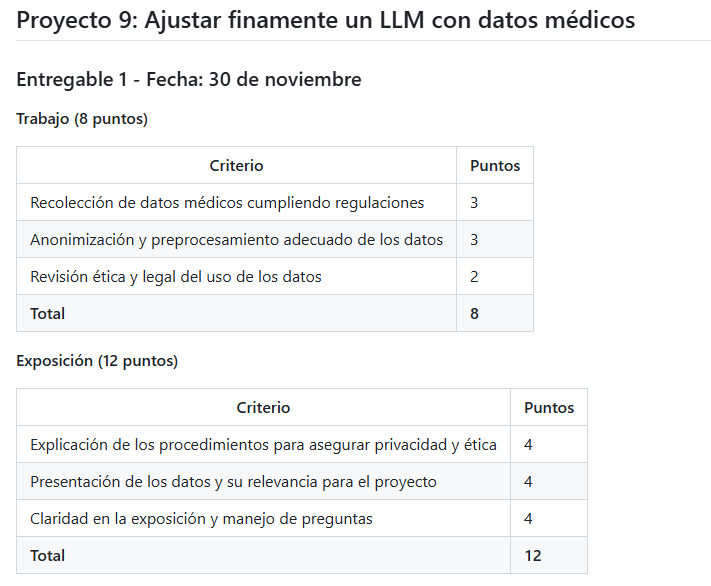